In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from IPython.display import clear_output

import matplotlib.pyplot as plt

# Experiment:

 Reduce the data of n dimensions(n x 1 ) to m x 1 and recover it back

## Model - 1: Linear

h = W X 

To recover back

X' = W^T h + b

## Model - 2: ReLU

h = W x 

To recover back

X' = ReLU(W^T h + b)



In [36]:
# higher and lower dim in paper
n = 100; m = 20

# generate random vector of size n x 1
X = torch.randn(n, 1)

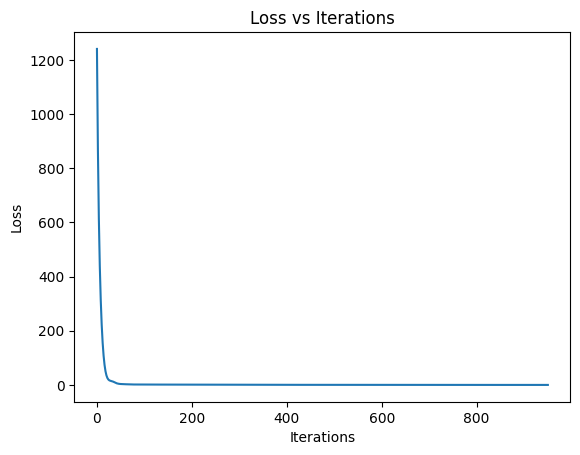

In [37]:
# Linear Model

# initialize weights and bias
W_m_n = torch.randn(m,n, requires_grad=True)
b_n_1 = torch.randn(n,1, requires_grad=True)

# mean square error loss
loss_mse = nn.MSELoss()

# optimizer
optimizer = optim.Adam([W_m_n, b_n_1], lr=0.01)

loss_arr = []

for iter in range(1000):
    optimizer.zero_grad()

    h_m_1 = W_m_n @ X
    X_prime_n_1 = W_m_n.T @ h_m_1 + b_n_1
    
    loss = loss_mse(X_prime_n_1, X)
    loss.backward()
    optimizer.step()
    

    loss_arr.append(loss.item())
    
    if iter % 50 == 0:
        clear_output(wait=True)
        plt.plot(loss_arr); plt.ylabel('Loss'); plt.xlabel('Iterations'); plt.title('Loss vs Iterations'); plt.show()
        

# plot the transformation matrix W^T W
linear_w_t_w = (W_m_n.T @ W_m_n)

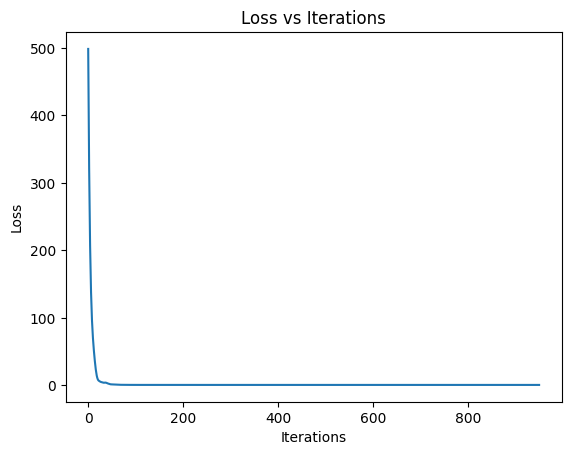

In [38]:
# ReLU Model

# initialize weights and bias
W_m_n = torch.randn(m,n, requires_grad=True)
b_n_1 = torch.randn(n,1, requires_grad=True)

# mean square error loss
loss_mse = nn.MSELoss()

# optimizer
optimizer = optim.Adam([W_m_n, b_n_1], lr=0.01)

loss_arr = []

for iter in range(1000):
    optimizer.zero_grad()

    h_m_1 = W_m_n @ X
    X_prime_n_1 = F.relu(W_m_n.T @ h_m_1 + b_n_1)
    
    loss = loss_mse(X_prime_n_1, X)
    loss.backward()
    optimizer.step()
    

    loss_arr.append(loss.item())
    
    if iter % 50 == 0:
        clear_output(wait=True)
        plt.plot(loss_arr); plt.ylabel('Loss'); plt.xlabel('Iterations'); plt.title('Loss vs Iterations'); plt.show()

# plot the transformation matrix W^T W
relu_w_t_w = (W_m_n.T @ W_m_n)

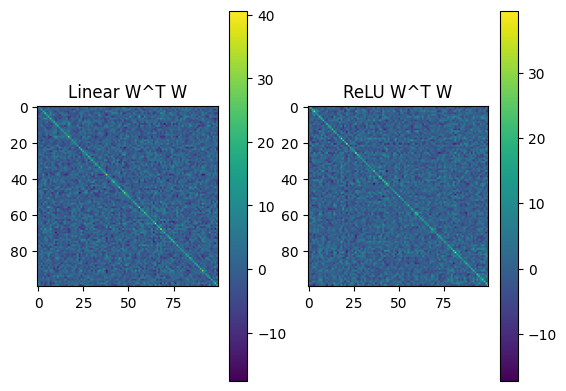

In [39]:
# plot both w_t_w - linear and relu side by side
plt.subplot(1, 2, 1)
plt.imshow(linear_w_t_w.detach().numpy()); plt.colorbar(); plt.title('Linear W^T W')
plt.subplot(1, 2, 2)
plt.imshow(relu_w_t_w.detach().numpy()); plt.colorbar(); plt.title('ReLU W^T W')
plt.show()


W.T W is same for both Linear and ReLU model. But when we add sparsity to model, we observe the chagnes in W^T W

In [44]:
def loss_with_sparsity(W_m_n, X_prime_n_1, X, sparsity_level):
    square_loss = torch.mean((X_prime_n_1 - X) ** 2)
    # sum of 
    sparsity_loss = 
    


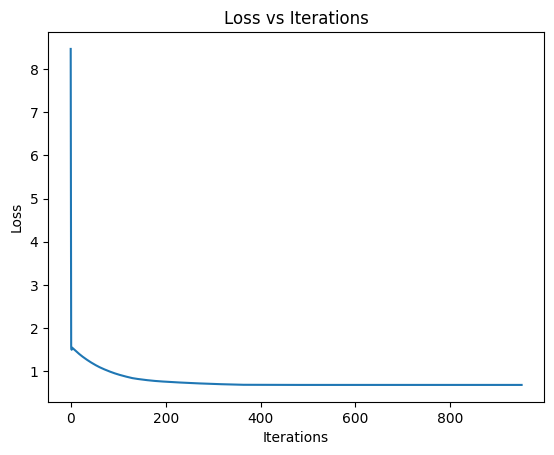

In [42]:
from re import T


sparsity_level = 0.9

# Initialize weights and bias
W_m_n = initialize_sparse_weights((m, n), sparsity_level)
b_n_1 = torch.randn(n, 1, requires_grad=True)

# Mean square error loss
loss_mse = nn.MSELoss()

# Optimizer
optimizer = optim.Adam([W_m_n, b_n_1], lr=0.01)

loss_arr = []

for iter in range(1000):
    optimizer.zero_grad()

    h_m_1 = W_m_n @ X
    X_prime_n_1 = F.relu(W_m_n.T @ h_m_1 + b_n_1)
    
    loss = loss_mse(X_prime_n_1, X)
    loss.backward()
    optimizer.step()

    # Reapply sparsity mask to maintain sparsity during training
    with torch.no_grad():
        mask = torch.rand((m, n)) > sparsity_level
        W_m_n.data *= mask

    loss_arr.append(loss.item())
    
    if iter % 50 == 0:
        clear_output(wait=True)
        plt.plot(loss_arr)
        plt.ylabel('Loss')
        plt.xlabel('Iterations')
        plt.title('Loss vs Iterations')
        plt.show()

sparse_relu_w_t_w = W_m_n.T @ W_m_n

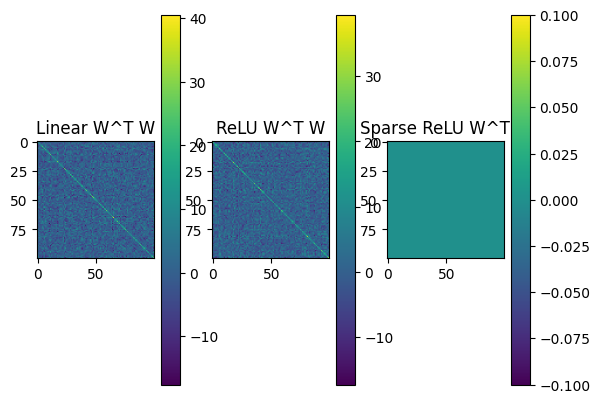

In [43]:
# plot all 3 w_t_w matrices side by side
plt.subplot(1, 3, 1)
plt.imshow(linear_w_t_w.detach().numpy()); plt.colorbar(); plt.title('Linear W^T W')
plt.subplot(1, 3, 2)
plt.imshow(relu_w_t_w.detach().numpy()); plt.colorbar(); plt.title('ReLU W^T W')
plt.subplot(1, 3, 3)
plt.imshow(sparse_relu_w_t_w.detach().numpy()); plt.colorbar(); plt.title('Sparse ReLU W^T W')
plt.show()


In [6]:
(20 ** -torch.linspace(0, 1, 10))[:, None]
qqq = torch.ones(())
qqq

tensor(1.)